<a href="https://colab.research.google.com/github/krishanuc/CapstoneSentimentAnalysis/blob/airbnb-dataset/TopicModeling_SentimentAnalysis_AirBnB_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IISc CCE AI/ML Capstone Project - Topic modeling and sentiment analysis based on user review data.**

### Main Focus - Sentiment Analsis
### **Purpose:**
This project aims to take user reviews as inputs and figure out the following:

*   Figure out topics discussed
*   Model the topics
*   Topic clustering
*   Unsupervised sentiment analysis on each topic cluster providing Top N positive, negative, and neutral sentiment topics
*   Figuring out the Top N impactful topic for overall rating improvement

### **Approach:**

We are taking a phased approach to achieve the goal. The following phases will be carried out:

#### **Milestone-1**

*  Cleaning and preparing data
*  Topic modeling
*  Unsupervised topic clustering
*  End of Milestone-1 - Top N trending topic

#### **Milestone-2**

* Unsupervised sentiment analysis on each topic cluster
* End of Milestone-2 - Top N positive, negative, and neutral sentiment topics

#### **Milestone-3**

* End of Milestone-3 - Top N impactful topic for overall rating improvement

[Source](https://www.sciencedirect.com/science/article/abs/pii/S095741741930154X)

### **Milestone-1**



1.   Import all the necessary libraries

In this dataset from Kaggle https://www.kaggle.com/datasets/rhonarosecortez/new-york-airbnb-open-data/data we have 3 files:


*   calendar.csv
*   listings.csv
*   reviewes.csv

We will be working only with reviews.csv as we want to do a topic modelling on the reviews.

**This dataset has missing sentiments of the reviews. In this version I will try to generate the sentiments on the reviews and see the data.**


In [218]:
# Importing all necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import re


!pip install -q bloxs
from bloxs import B


2. Import and view the dataset

In [219]:
# Importing the dataset

url = 'https://raw.githubusercontent.com/sajaldebnath/topic_sentiment_analysis/refs/heads/main/data/NY-Airbnb-Open-Data-Reviews.csv'
df = pd.read_csv(url, engine='python', on_bad_lines='skip' )

df.head(10) # view the first 10 rows of the dataframe

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2992450,15066586,2014-07-01,16827297,Kristen,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe."
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>"
2,2992450,27434334,2015-03-04,45406,Altay,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)"
3,2992450,28524578,2015-03-25,5485362,John,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome."
4,2992450,35913434,2015-06-23,15772025,Jennifer,"We were pleased to see how 2nd Street and the Ten Broeck neighborhood in Albany have come along. Its great to see all of the gorgeous brownstones, including the one we stayed in, being renovated and cared for.<br/>In terms of quality, I was pleased by the courtesy of the host's friend who lived nearby. He was there to let us in and make sure I knew to call with any problems. With a full kitchen and two bedrooms, my daughter and I felt at home with plenty of space. As a native of Albany I'm used to thin windows and occasionally noisy neighbors. If you don't sleep well, don't take the master bedroom and be aware that loud music may be playing during the evening and weekend. But there is a fan/ac unit to drown out the din from the street.<br/>This space has been renovated and a vast improvement I'm sure from where it was, and I'm hoping progress will continue here as it seemed a few projects were incomplete. I would have loved to enjoy more sunlight in the house but there was a ton of tree debris in the back yard so there was no way to enjoy opening the windows.<br/>On my own, this place was fine, but if traveling with my child again I will probably pick a quieter location where I'd be able to open windows or put her down for a nap without worrying about excessive noise."
5,2992450,38893053,2015-07-19,11614467,Stephanie,"The flat is not in a good area, while we were fine you do have to be

In [220]:
# Removing the unnecessary columns since we will only be working with reviews
# later on we want to co-relate reviews with listings and perhaps with the reviewers
data = df[['listing_id', 'comments']]


data.head(10)

,listing_id,comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe."
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>"
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)"
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome."
4,2992450,"We were pleased to see how 2nd Street and the Ten Broeck neighborhood in Albany have come along. Its great to see all of the gorgeous brownstones, including the one we stayed in, being renovated and cared for.<br/>In terms of quality, I was pleased by the courtesy of the host's friend who lived nearby. He was there to let us in and make sure I knew to call with any problems. With a full kitchen and two bedrooms, my daughter and I felt at home with plenty of space. As a native of Albany I'm used to thin windows and occasionally noisy neighbors. If you don't sleep well, don't take the master bedroom and be aware that loud music may be playing during the evening and weekend. But there is a fan/ac unit to drown out the din from the street.<br/>This space has been renovated and a vast improvement I'm sure from where it was, and I'm hoping progress will continue here as it seemed a few projects were incomplete. I would have loved to enjoy more sunlight in the house but there was a ton of tree debris in the back yard so there was no way to enjoy opening the windows.<br/>On my own, this place was fine, but if traveling with my child again I will probably pick a quieter location where I'd be able to open windows or put her down for a nap without worrying about excessive noise."
5,2992450,"The flat is not in a good area, while we were fine you do have to be careful (even our cab driver told us that) I wouldn't stay again. The flat also does not have air con- the large bedroom had an obnoxiously loud fan which kept the one room cool, the rest of the house is very hot. So if you are going to stay here bear t

In [221]:
# Next let's find out the details of the dataset
data.info() #provides a summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24752 entries, 0 to 24751
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  24752 non-null  int64 
 1   comments    24745 non-null  object
dtypes: int64(1), object(1)
memory usage: 386.9+ KB


From the above information we can see that there are 24752 rows of data and without any null values. So, we don't have to worry about null data in this dataset.
Still let's handle that situation for any future datasets.

In [222]:
# Explicitly check for missing values
if (data.isnull().sum() > 0).any():
    print("Missing values found in the dataset.")
    # The best approach is to just drop them.
    data = data.dropna(subset=['comments'])
else:
    print("No missing values found in the dataset.")

data.info()

Missing values found in the dataset.
<class 'pandas.core.frame.DataFrame'>
Index: 24745 entries, 0 to 24751
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  24745 non-null  int64 
 1   comments    24745 non-null  object
dtypes: int64(1), object(1)
memory usage: 580.0+ KB


In [223]:
data.isna().sum()

,0
listing_id,0
comments,0


In [224]:
data['listing_id'].nunique() # Number of unique listings. The rest of reviews of the same listings

366

3. In this section we will handle the pre-processing of the date which includes the following:

* **Lower Casing**: Each text is converted to lowercase.

* **Replacing URLs**: Links starting with "http" or "https" or "www" are replaced by "URL".

* **Replacing Emojis**: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

* **Replacing Usernames**: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

* **Removing Non-Alphabets**: Replacing characters except Digits and Alphabets with a space.

* **Removing Consecutive letters**: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

* **Removing Short Words**: Words with length less than 2 are removed.

* **Removing Stopwords**: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

* **Lemmatizing**: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)


In [225]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [226]:
def preprocess_comments(comments):

    # Defining regex patterns.
    urlPattern        = r'http[s]?://\S+' # Removes any website link starting with http or https
    userPattern       = '@[^\s]+'         # Removes any users names starting with @ character
    alphaPattern      = "[^a-zA-Z0-9]"    # Removes text except alpha numeric patterns
    sequencePattern   = r"(.)\1\1+"       # Finds out 3 or more repeating letters likes "aaa"
    seqReplacePattern = r"\1\1"           # Replace the repeating letter sequence with two letters
    symbolPattern = r'Ã[^\x80-\xBF]+'     # Finds out the special characters like Ã
    spacePattern = r'\s+'                 # Finds out extra spaces betweem words
    brtags = r"<br ?/?>"                  # Finds out all the <br/>, <br>, </br> tags

    # Replace all URls with ' '
    comments = re.sub(urlPattern, '', comments, flags=re.MULTILINE)
    # Replace @USERNAME to ' '.
    comments = re.sub(userPattern,' ', comments)
    # Replace <br/>, <br>, </br> with " "
    comments = re.sub(brtags, ' ', comments)
    # Replace all non alphabets.
    comments = re.sub(alphaPattern, " ", comments)
    # Replace 3 or more consecutive letters by 2 letters.
    comments = re.sub(sequencePattern, seqReplacePattern, comments)
    # Replace special encoded symbols that appear as characters like Ã, Å, Ë
    comments = re.sub(symbolPattern, ' ', comments)


    # Replace all emojis.
    for emoji in emojis.keys():
      comments = comments.replace(emoji, " " + emojis[emoji])

    # Replace multiple spaces with a single space
    comments = re.sub(spacePattern, ' ', comments)
    # Remove all leading or trailing spaces
    comments = comments.strip()

    return comments.lower()  # Convert all to lowercase

In [227]:
import time
t = time.time()
data['processed_comments'] = data['comments'].apply(preprocess_comments) #applying the preprocess_comments function to comments column

print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 2 seconds


In [228]:
#VIEW THE CLEANED Comments IN "comments" column again
pd.set_option('display.max_colwidth', None) #to view text fully and so that
#pandas doesn't truncate the text

data.head(10) # Printing the data to see the updated result

,listing_id,comments,processed_comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome.",kenneth was ready when i got there and arranged for the upstairs neighbor to meet me at the door with the keys shortly after that i was left on my own in the privacy of this large 2 br apartment just like i like it i really like my privacy and there was no time at which anyone came to visit me or bother me unannounced at one point kenneth had to pic up a refrigerator stored in the apartment but the neighbor lady gave me plenty of notice and i was on my way out before he got there when i returned the extra refrigerator was gone and i had the nice quiet apartment to myself at one poi

**Removing the Stopwords**:

In this section we will remove all the defined stopwords

In [229]:
import string
# import nltk
# Download the stopwords list
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

#Let's define a list of custom_stop_words which does not add value to the topic
custom_stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'us']


# Define the function to remove the stopword from the tokens
stops = stopwords.words("english")
updated_stops = stops+custom_stopwordlist

def remove_stops(comment):

    #removes all stop words, including custom words
    words = comment.split()
    final = []
    for word in words:
        if word not in updated_stops:
            # Lemmatizing the words
            #word = lemmatizer.lemmatize(word)
            word = lemmatizer.lemmatize(word, pos='v')
            final.append(word)

    #reassembles the text without stop words
    final = " ".join(final)

    #removes all punctuation
    final = final.translate(str.maketrans("", "", string.punctuation))

    #removes all numbers
    final = "".join([i for i in final if not i.isdigit()])

    #eliminates double white spaces
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [230]:
# Remove stopwords from the original text and lemmatize them
data['Filtered_comments'] = data['processed_comments'].apply(remove_stops)

print(f'Removing stopwords from processed_comments and lemmatizing them complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')


Removing stopwords from processed_comments and lemmatizing them complete.
Time Taken: 8 seconds


In [231]:
# Let's check the updated data again
data.head(10)

,listing_id,comments,processed_comments,Filtered_comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and cove

In [232]:
# Tokenize using nltk library
# pip install nltk # If not already present then install the module
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_comment(comment):
    tokens = word_tokenize(comment) # Break up and tokenize the comment
    return tokens

# Calling the tokenize_comment function on the comment to tokenize it
# Also adding another column called "Tokens" to store the tokenized words
data['Tokens'] = data['Filtered_comments'].apply(tokenize_comment)

print(f'Tokenization complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenization complete.
Time Taken: 12 seconds


In [233]:
# Let's check the tokenized data
data.head(10)

,listing_id,comments,processed_comments,Filtered_comments,Tokens
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,"[large, apartment, nice, kitchen, bathroom, kenneth, leave, drink, nice, cousin, live, upstairs, nice, helpful, internet, work, half, time, everything, street, hear, main, bedroom, wonderful, stay, exactly, need, best, area, town, never, felt, unsafe]"
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,"[may, little, late, say, kenneth, quick, respond, request, leave, supply, refrigerator, kindly, show, round, downtown, albany, without, car, arrange, cousin, kristina, take, supermarket, apartment, large, clean, many, original, feature, situate, historical, area, fairly, central, although, like, rest, albany, climb, steep, hill, get, foot]"
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,"[apartment, clean, convenient, downtown, one, thing, keep, mind, one, bedroom, huge, tiny, travel, friend, might, flip, coin]"
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of not

#### **4. STEMMING**

Stemming reduces words to their root form (or stem). Note: may not always be a valid word in the language.

**For example**:
* "playing" might be stemmed to "play"

* "studying" might be stemmed to "study"

* "running" might be stemmed to "run"

* "ring" might be stemmed to "r" (ineffiency)

#### **5. LEMMATIZATION**

Lemmatization reduces words to their base or dictionary form (lemma) by considering their dictionary meaning hence providing more accuracy than stemming.

For example:

* "running" becomes "run,"

* "better" becomes "good."

* "ring" remains "ring."

Hence I won't be performing Stemming, I'll be going forward with Lemmatization.

In [234]:
# Let's see the updated result
# data.head(10)

### Overall WordCloud

In [235]:
# concatenate the texts in the 'pre_review' column into a single string
text = ' '.join([' '.join(row) for row in data['Tokens']])

In [236]:
from wordcloud import WordCloud

# create the word cloud
wordcloud = WordCloud(background_color='white', max_font_size = 80, max_words = 100, collocations = False).generate(text)

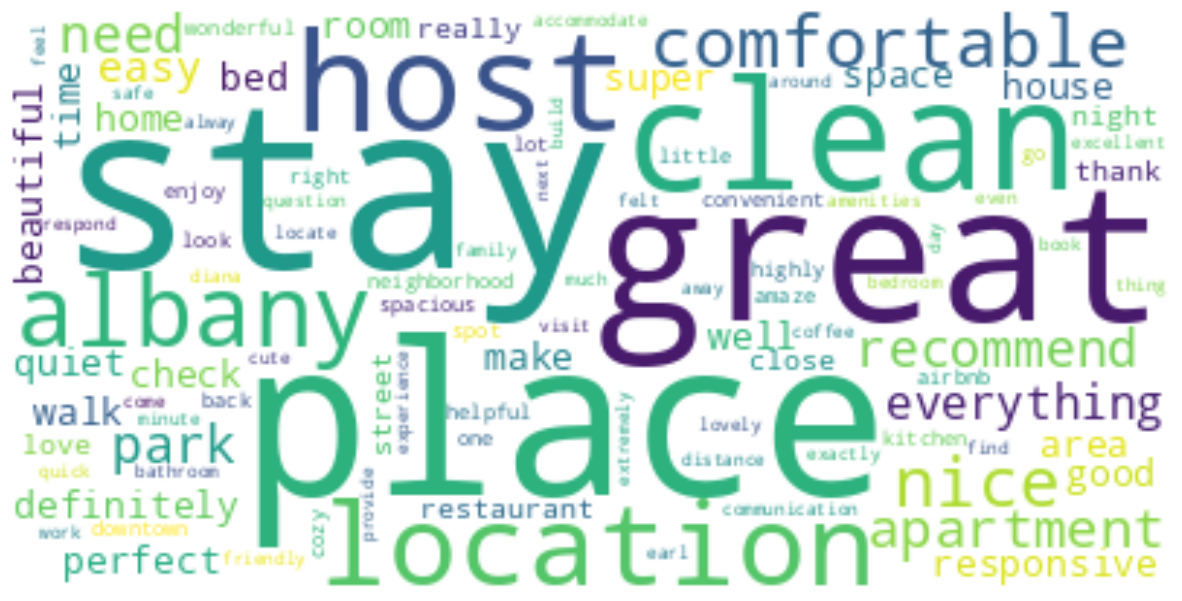

In [237]:
# show the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Sentiment Analysis with NLTK Library**

In [238]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [239]:
# Testing the analyzer

pd.DataFrame({'Text': ['This is a test sentence with a positive sentiment.', 'This is a test sentence with a negative sentiment.']})

,Text
0,This is a test sentence with a positive sentiment.
1,This is a test sentence with a negative sentiment.


In [240]:
# analyze sentiment in every review texts ('Tokens' column)
data['sentiment'] = data['Tokens'].apply(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])

In [241]:
data.head()

,listing_id,comments,processed_comments,Filtered_comments,Tokens,sentiment
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,"[large, apartment, nice, kitchen, bathroom, kenneth, leave, drink, nice, cousin, live, upstairs, nice, helpful, internet, work, half, time, everything, street, hear, main, bedroom, wonderful, stay, exactly, need, best, area, town, never, felt, unsafe]",0.9578
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,"[may, little, late, say, kenneth, quick, respond, request, leave, supply, refrigerator, kindly, show, round, downtown, albany, without, car, arrange, cousin, kristina, take, supermarket, apartment, large, clean, many, original, feature, situate, historical, area, fairly, central, although, like, rest, albany, climb, steep, hill, get, foot]",0.8591
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,"[apartment, clean, convenient, downtown, one, thing, keep, mind, one, bedroom, huge, tiny, travel, friend, might, flip, coin]",0.8020
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neig

In [242]:
def sentiment_from_percentage(percentage):
    """Determines sentiment based on a percentage value."""

    if percentage > 0.6:
        return "Positive"
    elif percentage < 0.4:
        return "Negative"
    else:
        return "Neutral"


# Providing labels to the sentiments and adding the column "mood"
data['mood'] = data['sentiment'].apply(sentiment_from_percentage)

In [243]:
def ratings_from_percentage(percentage):
    """Determines ratings based on a percentage value."""

    if percentage > 0.8:
        rating = 5
    elif percentage > 0.6 and percentage <= 0.8:
        rating = 5
    elif percentage > 0.4 and percentage <= 0.6:
        rating = 5
    elif percentage > 0.2 and percentage <= 0.4:
        rating = 5
    else:
        rating = 5

    return rating

# Providing labels to the sentiments and adding the column "mood"
data['rating'] = data['sentiment'].apply(ratings_from_percentage)

In [244]:
data.head()

,listing_id,comments,processed_comments,Filtered_comments,Tokens,sentiment,mood,rating
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,"[large, apartment, nice, kitchen, bathroom, kenneth, leave, drink, nice, cousin, live, upstairs, nice, helpful, internet, work, half, time, everything, street, hear, main, bedroom, wonderful, stay, exactly, need, best, area, town, never, felt, unsafe]",0.9578,Positive,5
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,"[may, little, late, say, kenneth, quick, respond, request, leave, supply, refrigerator, kindly, show, round, downtown, albany, without, car, arrange, cousin, kristina, take, supermarket, apartment, large, clean, many, original, feature, situate, historical, area, fairly, central, although, like, rest, albany, climb, steep, hill, get, foot]",0.8591,Positive,5
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,"[apartment, clean, convenient, downtown, one, thing, keep, mind, one, bedroom, huge, tiny, travel, friend, might, flip, coin]",0.8020,Positive,5
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refri

In [245]:
# calculate mean of the review sentiments in each listing
data_avg_sentiment = data.groupby('listing_id')['sentiment'].mean().reset_index(name='avg_sentiment')

In [246]:
data_avg_sentiment

,listing_id,avg_sentiment
0,2992450,0.836956
1,3820211,0.828952
2,5651579,0.701982
3,6623339,0.795660
4,8035768,0.823277
...,...,...
361,1191466513839284968,0.953000
362,1192795085655166314,0.928700
363,1201525324551556925,0.835975
364,1223423894415302002,0.511067


In [247]:
data_avg_sentiment['mood'] = data_avg_sentiment['avg_sentiment'].apply(sentiment_from_percentage)

In [248]:
# calculate review counts for each listing
data_review_count = data.groupby('listing_id').size().reset_index(name='review_cnt')

In [249]:
# merge two dataframes by 'listing_id'
data_review_summary = data_avg_sentiment.merge(data_review_count, on='listing_id')

In [250]:
data_review_summary.query('mood == "Negative"')

,listing_id,avg_sentiment,mood,review_cnt
70,42389085,-0.03805,Negative,2
146,559249822516788574,0.21875,Negative,2
315,1057932481605319073,0.07720,Negative,1
329,1111221935683053416,0.26622,Negative,5
356,1183460523409924571,0.32460,Negative,2


### **Overall Review Sentiments**

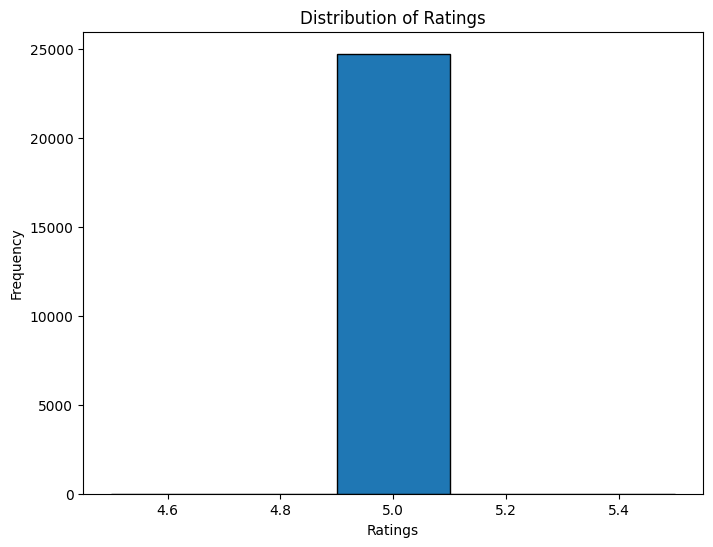

In [251]:
# @title Distribution of Ratings (Overwhelmingly positive)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['rating'], bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
_ = plt.ylabel('Frequency')

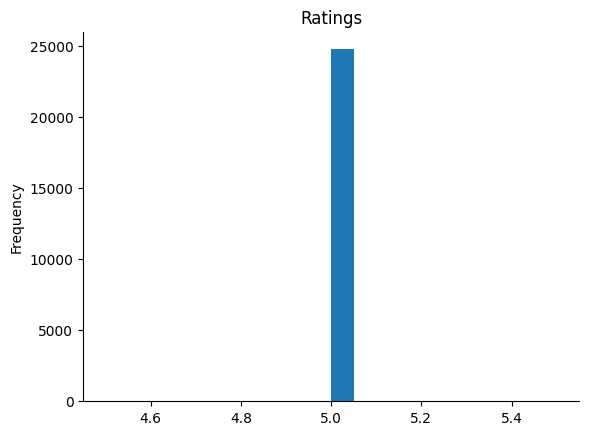

In [252]:
# @title Ratings
data['rating'].plot(kind='hist', bins=20, title='Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

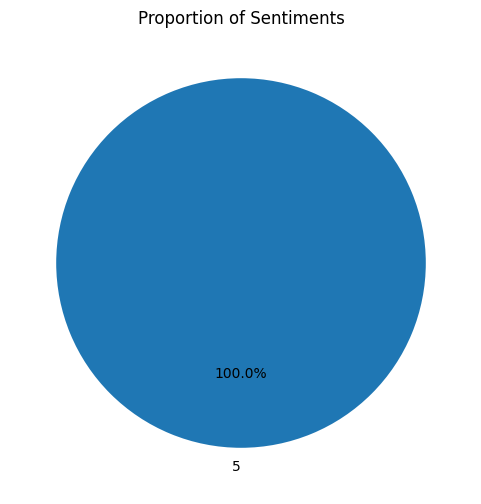

In [253]:
# @title Proportion of Sentiments

sentiment_counts = data['rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Proportion of Sentiments')

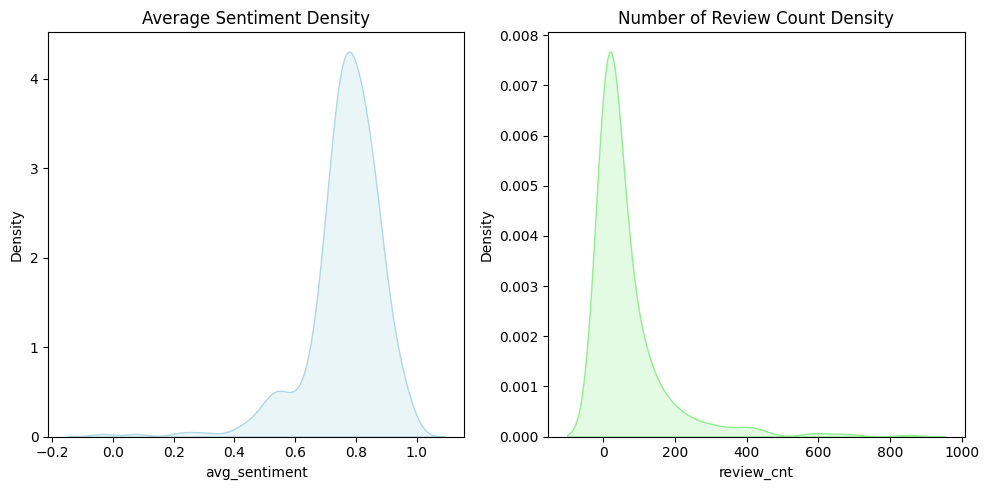

In [254]:
# plot a histogram using 'sum_sentiment' and 'review_cnt' columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sb.kdeplot(data_review_summary['avg_sentiment'], color='lightblue', fill=True, ax=ax1)
sb.kdeplot(data_review_summary['review_cnt'], color='lightgreen', fill=True, ax=ax2)
ax1.set(title='Average Sentiment Density')
ax2.set(title='Number of Review Count Density')
fig.tight_layout()
plt.show()

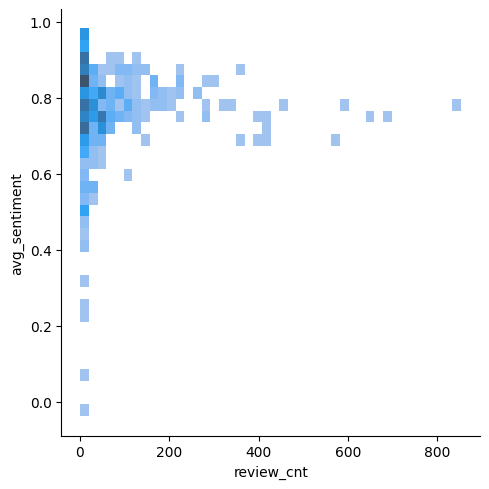

In [255]:
sb.displot(data_review_summary, x='review_cnt', y='avg_sentiment')
plt.show()

### Top 50 Best AirBnb Listings in NYC
**Sorted by average review sentiment (*only listings with >= 10 review counts)**

In [256]:
n = 50
rev_cnt = 10

dfTopN = data_review_summary.loc[data_review_summary['review_cnt'] >= rev_cnt]\
.sort_values(by='avg_sentiment', ascending=False)\
.head(n)

In [257]:
# create top n text reviews for wordcloud
text = ''
for listing_id in dfTopN.listing_id:
    review_token = data.loc[data['listing_id'] == listing_id]['Tokens']
    text = ' '.join([' '.join(row) for row in review_token])

# print(text)

In [258]:
# create the top n listing word cloud
wordcloud_topN = WordCloud(background_color='white', max_font_size = 80, max_words = 1000, collocations = False).generate(text)

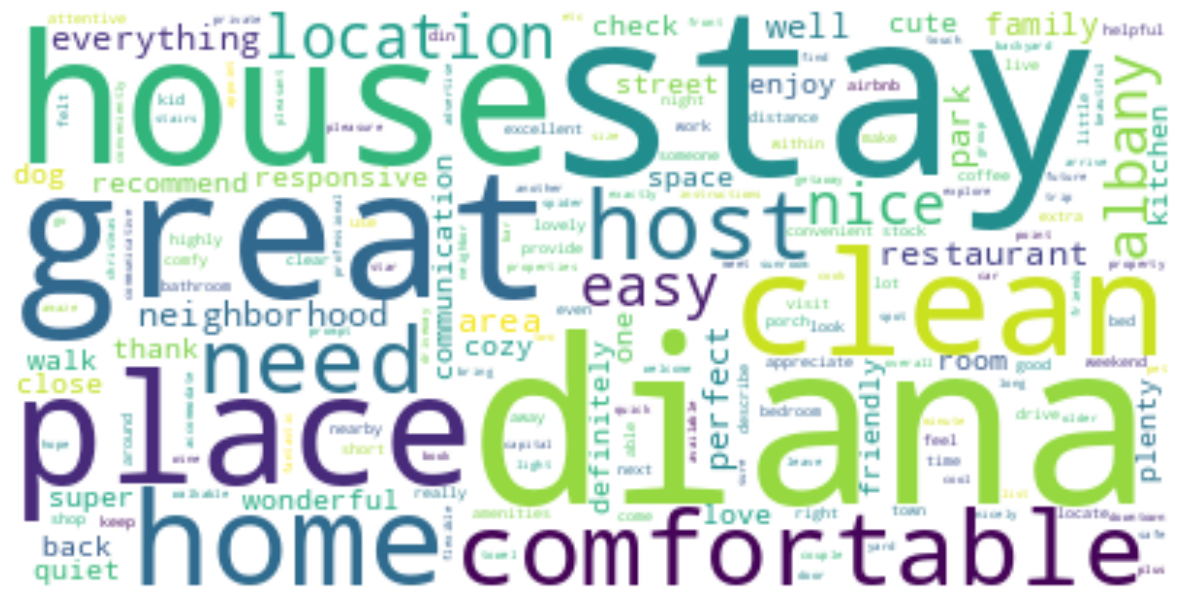

In [259]:
# show the top n word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud_topN, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Implementing LDA Analysis**

In this section we will apply LDA analysis on the data to find the topics

In [260]:
!pip install pyLDAvis

In [261]:
# Importing libraries
import numpy as np
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy

#visualization

import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [262]:
# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(data['Tokens'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['Tokens']]

# Apply LDA
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=4, id2word=dictionary)

# Print topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.023*"park" + 0.018*"nice" + 0.016*"walk" + 0.015*"place"')
(1, '0.049*"great" + 0.044*"place" + 0.041*"stay" + 0.025*"host"')
(2, '0.015*"apartment" + 0.013*"stay" + 0.011*"room" + 0.011*"clean"')
(3, '0.058*"stay" + 0.025*"would" + 0.025*"place" + 0.020*"great"')


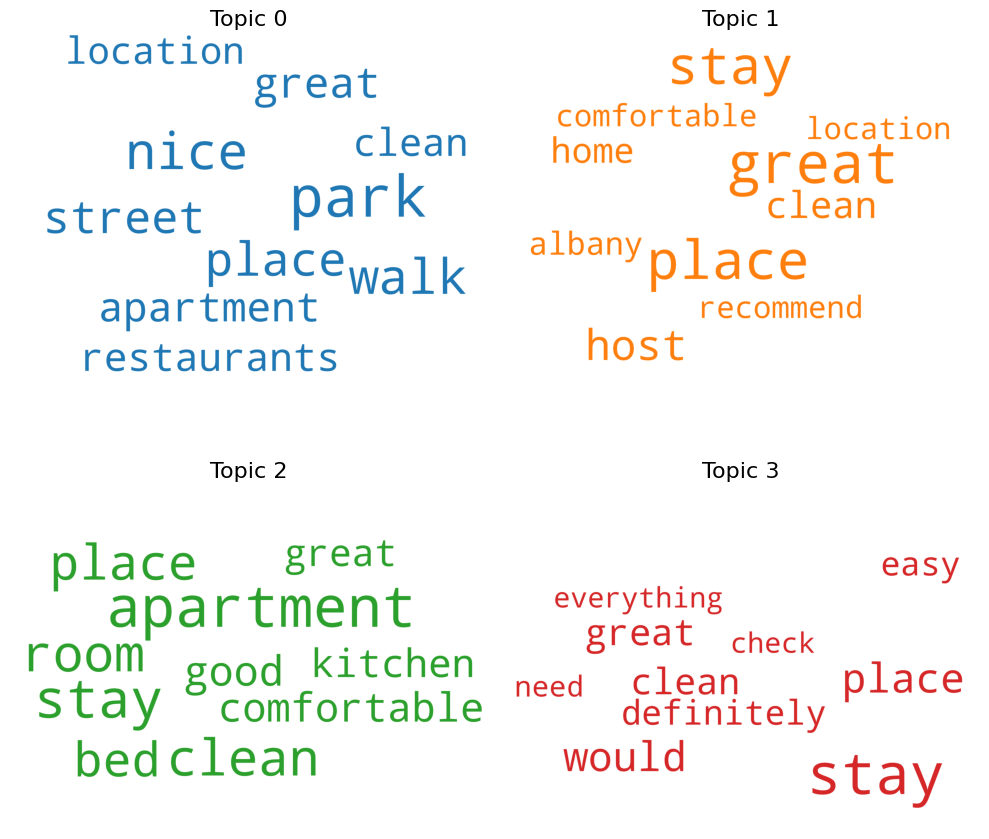

In [263]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=updated_stops,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [264]:
# @title Another Approach to LDA
id2word = corpora.Dictionary(data['Tokens'])

corpus = []
for text in data['Tokens']:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
apartment


In [275]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [276]:
# @title Visualizing the Data

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.308074 -0.194543       1        1  45.873646
3     -0.206353  0.270615       2        1  32.835413
1      0.191666 -0.290578       3        1  15.212881
0      0.322760  0.214507       4        1   6.078061, topic_info=               Term          Freq         Total Category  logprob  loglift
23             stay  15001.000000  15001.000000  Default  30.0000  30.0000
188           place  11449.000000  11449.000000  Default  29.0000  29.0000
165           great  11369.000000  11369.000000  Default  28.0000  28.0000
372            park   3418.000000   3418.000000  Default  27.0000  27.0000
36            clean   7017.000000   7017.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
336              es    104.139797    104.918458   Topic4  -5.5667   2.7930
1750           pour    104.160327    104.942984   Topic4  -5.5665   2.7930
195             put    115.321479    116.189625   Topic4  -5.4647   2.7930
1137  air_condition    104.238382    105.355539   Topic4  -5.5658   2.7898
978           front    106.022799    253.604865   Topic4  -5.5488   1.9284

[188 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
141       2  0.999169           able
606       2  0.998884     absolutely
314       1  0.999504    accommodate
645       3  0.998989         across
1137      4  0.987134  air_condition
...     ...       ...            ...
215       4  0.995412        windows
481       3  0.998304         within
29        1  0.999209      wonderful
30        2  0.999813           work
217       1  0.999939          would

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

#BIGRAMS AND TRIGRAMS

In [277]:
# @title Make Bigram and Trigrams
bigram_phrases = gensim.models.Phrases(data['Tokens'], min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data['Tokens']], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data['Tokens'])
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

['large', 'apartment', 'nice', 'kitchen', 'bathroom', 'kenneth', 'leave', 'drink', 'nice', 'cousin', 'live', 'upstairs', 'nice', 'helpful', 'internet', 'work', 'half', 'time', 'everything', 'street']


In [278]:
# @title TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [279]:
# @title LDA Modeling on Bigram and Trigrams
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [280]:
# @title Save the model
lda_model.save("test_model.model")

In [281]:
new_model = gensim.models.ldamodel.LdaModel.load("test_model.model")

In [282]:
test_doc = corpus[-1]

vector = new_model[test_doc]
print (vector)

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return (sub_li)
new_vector = Sort(vector)
print (new_vector)

[(0, 0.018836735), (1, 0.0632689), (2, 0.80670214), (3, 0.11119226)]
[(2, 0.80670214), (3, 0.11119226), (1, 0.0632689), (0, 0.018836735)]


In [283]:
# @title Visualizing the data
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.308084 -0.194497       1        1  45.871956
3     -0.206392  0.270605       2        1  32.834724
1      0.191691 -0.290636       3        1  15.215479
0      0.322785  0.214528       4        1   6.077841, topic_info=               Term          Freq         Total Category  logprob  loglift
23             stay  14995.000000  14995.000000  Default  30.0000  30.0000
188           place  11429.000000  11429.000000  Default  29.0000  29.0000
165           great  11351.000000  11351.000000  Default  28.0000  28.0000
372            park   3417.000000   3417.000000  Default  27.0000  27.0000
36            clean   6988.000000   6988.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
336              es    103.990500    104.768413   Topic4  -5.5681   2.7931
1750           pour    104.011119    104.793022   Topic4  -5.5679   2.7930
195             put    115.155688    116.022988   Topic4  -5.4661   2.7930
1137  air_condition    105.212800    106.333906   Topic4  -5.5564   2.7899
978           front    105.865710    253.418622   Topic4  -5.5502   1.9276

[188 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
141       2  0.998557           able
606       2  0.999583     absolutely
314       1  0.999566    accommodate
645       3  0.997910         across
1137      4  0.987455  air_condition
...     ...       ...            ...
215       4  0.996837        windows
481       3  0.998131         within
29        1  0.999175      wonderful
30        2  0.999428           work
217       1  0.999951          would

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])